# Monte Carlo Simulation for Option Pricing

This notebook estimates the prices of a European Call and Put option using the Monte Carlo Simulation approach under the Geometric Brownian Motion model.

Simulating 10,000 stock price paths for a 1-year horizon using:
- Initial price: $100  
- Strike price: $105  
- Risk-free rate: 5%  
- Volatility: 20%



In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [8]:
def monte_carlo_gbm(S0, K, r, sigma, T, N, seed=None, plot=True):
    """
    Simulate stock price at maturity S_T using Geometric Brownian Motion (GBM)
    and estimate European call and put option prices using Monte Carlo simulation.
    Parameters: 
        S0 : float - initial stock price
        K  : float - strike price
        r  : float - risk-free rate         
        sigma : float - volatility
        T  : float - time to maturity
        N  : int   - number of simulations
        seed : int or None - random seed for reproducibility
        plot : bool - whether to plot histogram of S_T
    Returns:
        dict with keys:
            "S_T" : simulated stock prices at maturity
            "mean_ST" : sample mean of S_T
            "std_ST" : sample standard deviation of S_T
            "call_price_MC" : Monte Carlo estimated call option price
            "put_price_MC" : Monte Carlo estimated put option price
            "call_price_BS" : Black-Scholes analytic call option price
            "put_price_BS" : Black-Scholes analytic put option price
 """
    if seed is not None:
        np.random.seed(seed)

    # Draw N samples from standard normal distribution
    Z = np.random.randn(N)

    # Simulate S_T using GBM formula
    S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * Z * np.sqrt(T))

    # Calculate sample mean and standard deviation of S_T
    mean_ST = S_T.mean()
    std_ST = S_T.std(ddof=1)

    # Estimate European call and put option prices using Monte Carlo
    payoff_call = np.maximum(S_T - K, 0.0)
    payoff_put  = np.maximum(K - S_T, 0.0)
    call_price_MC = np.exp(-r * T) * payoff_call.mean()
    put_price_MC  = np.exp(-r * T) * payoff_put.mean()

    # Black-Scholes analytic prices (for comparison)
    def bs_prices(S, K, r, sigma, T):
        if T <= 0:
            # immediate payoff
            call = max(S - K, 0.0)
            put  = max(K - S, 0.0)
            return call, put
        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        put  = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        return call, put

    call_price_BS, put_price_BS = bs_prices(S0, K, r, sigma, T)

    # Plot histogram of S_T and mark the mean
    if plot:
        plt.figure(figsize=(10, 6))
        plt.hist(S_T, bins=60, color='skyblue', edgecolor='k', alpha=0.7)
        plt.axvline(mean_ST, color='red', linestyle='--', linewidth=2, label=f"Sample mean = {mean_ST:.4f}")
        plt.axvline(S0 * np.exp(r * T), color='green', linestyle=':', linewidth=1.5, label=f"Theoretical E[S_T] = {S0*np.exp(r*T):.4f}")
        plt.title(f"Histogram of simulated S_T (N={N}, sigma={sigma:.2%})")
        plt.xlabel("S_T")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(alpha=0.25)
        plt.show()

    results = {
        "S_T": S_T,
        "mean_ST": mean_ST,
        "std_ST": std_ST,
        "call_price_MC": call_price_MC,
        "put_price_MC": put_price_MC,
        "call_price_BS": call_price_BS,
        "put_price_BS": put_price_BS,
    }
    return results

In [9]:
def compare_volatilities(S0, K, r, sigmas, T, N, seed=None):
    """
    Compare distributions of S_T for different volatilities by overlaying histograms.
    Parameters: 
        S0 : float    - initial stock price
        K  : float    - strike price
        r  : float    - risk-free rate
        sigmas : list - list of volatilities to compare
        T  : float    - time to maturity
        N  : int      - number of simulations
        seed : int or None - random seed for reproducibility
    """
    if seed is not None:
        np.random.seed(seed)

    plt.figure(figsize=(11, 6))
    colors = ['C0', 'C1', 'C2', 'C3', 'C4']
    for i, sigma in enumerate(sigmas):
        Z = np.random.randn(N)
        S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * Z * np.sqrt(T))
        # Plot histogram for this volatility
        plt.hist(S_T, bins=80, density=True, alpha=0.45, color=colors[i % len(colors)],
                 label=f"sigma={sigma:.0%}")
        # Mark theoretical mean
        mean_theoretical = S0 * np.exp(r * T)
        plt.axvline(mean_theoretical, color='k', linestyle='--', linewidth=0.8 if i==0 else 0.6)

    plt.title(f"Overlaid histograms of S_T for different volatilities (N={N})")
    plt.xlabel("S_T")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(alpha=0.25)
    plt.show()

Running Monte Carlo GBM simulation...


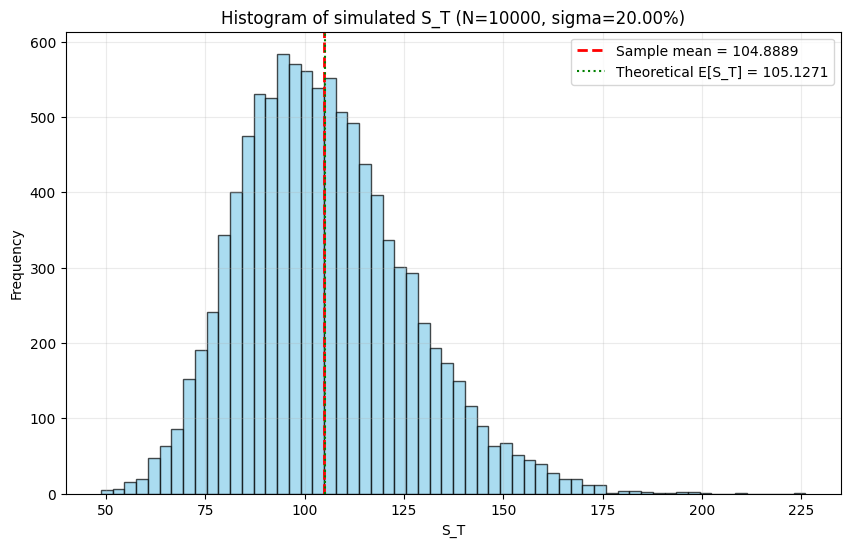

Sample mean of S_T: 104.888903
Sample std  of S_T: 21.058641
Call price (MC): 7.907570
Put price  (MC): 8.013248
Black-Scholes analytic comparison:
Call (BS): 8.021352
Put  (BS): 7.900442


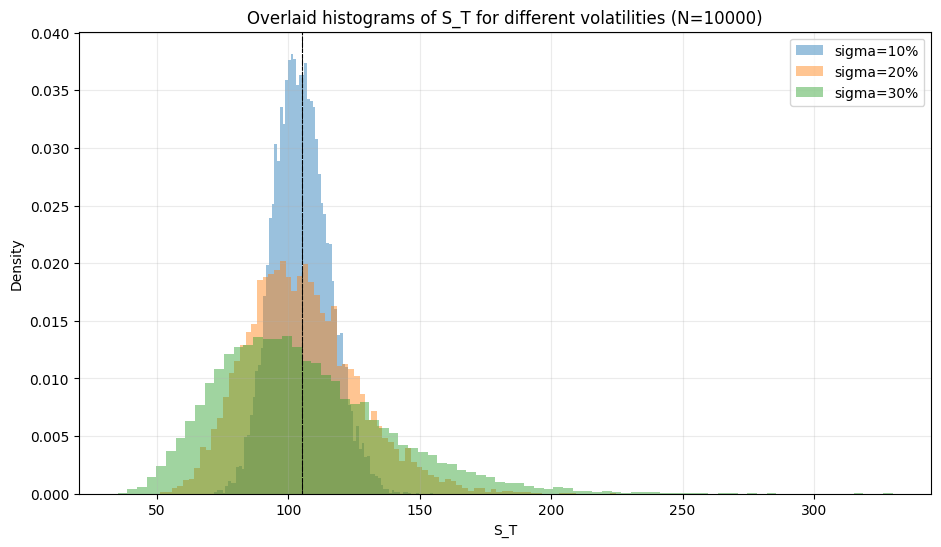

In [10]:
def simulation_run():
    """
    Run of the Monte Carlo GBM simulation and option pricing.
    """
    S0 = 100.0
    K  = 105.0
    r  = 0.05
    sigma = 0.20
    T  = 1.0
    N  = 10000
    seed = 12345

    print("Running Monte Carlo GBM simulation...")
    res = monte_carlo_gbm(S0, K, r, sigma, T, N, seed=seed, plot=True)
    print(f"Sample mean of S_T: {res['mean_ST']:.6f}")
    print(f"Sample std  of S_T: {res['std_ST']:.6f}")
    print(f"Call price (MC): {res['call_price_MC']:.6f}")
    print(f"Put price  (MC): {res['put_price_MC']:.6f}")
    print("Black-Scholes analytic comparison:")
    print(f"Call (BS): {res['call_price_BS']:.6f}")
    print(f"Put  (BS): {res['put_price_BS']:.6f}")

    # Compare volatilities
    compare_volatilities(S0, K, r, [0.10, 0.20, 0.30], T, N, seed=seed)

if __name__ == "__main__":
    simulation_run()